

# Project: TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report we will be investigating the TMDb Movies Dataset to figure out 

1-Which genres are most popular from year to year?

2-What kinds of properties are associated with movies that have high revenues?

the data set have 21 columns and more than 10000 rows.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

creating a new feature for the profit of every movie then removing the "budget" and "revenue" features as profit feature is better for analysis

In [3]:
df['profit'] = df['revenue'] - df['budget']
df.drop(['budget','revenue'],1,inplace = True)

exploring how the data profit are split and suprisingly more than 40 % have zero profit!!

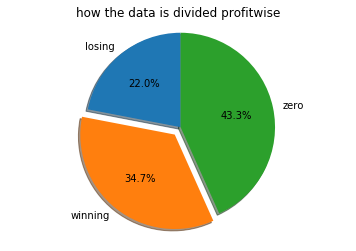

In [4]:
labels = ['losing','winning','zero']
sizes = [len(df[df['profit'] < 0]),len(df[df['profit'] > 0]),len(df[df['profit'] == 0])]
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);
plt.axis('equal');
plt.title('how the data is divided profitwise');

correlation matrix to see the relation between the quantitaive features and we see the the popularity has high correlation scores with profit

In [5]:
df.corr()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
id,1.000000,-0.014350,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477,-0.074960
popularity,-0.014350,1.000000,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083,0.628991
runtime,-0.088360,0.139033,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676,0.136036
vote_count,-0.035551,0.800828,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942,0.755905
vote_average,-0.058363,0.209511,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085,0.183109
release_year,0.511364,0.089801,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256,0.032002
budget_adj,-0.189015,0.513550,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607,0.545624
revenue_adj,-0.138477,0.609083,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000,0.914145
profit,-0.074960,0.628991,0.136036,0.755905,0.183109,0.032002,0.545624,0.914145,1.000000




### Data Cleaning (Replace this with more specific notes!)

removing not necessery columns and removing the duplicates

In [6]:
df.drop([ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview','vote_count','vote_average','tagline'],axis = 1,inplace = True)
df.drop_duplicates(keep = 'first',inplace = True)

converting the datatype of release_date to datetime  

In [7]:

df.release_date = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
release_year            10865 non-null int64
profit                  10865 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 933.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

to show the most popular genres from year to year we had to loop over the genres feature and extract the most frequent genres in each year and we Saw that Drama is almost the most frequent genre in almost every year and some times Comefy will show up as the most Frequent 

In [9]:
for i in range(df['release_year'].min(),df['release_year'].max()+1):
    pg = df[df['release_year'] == i]
    pg = pg['genres'].str.cat(sep = '|')
    pg = pd.Series(pg.split('|'))
    pg = pg.value_counts(ascending = False).index
    print(i,'      ', pg[0])

1960        Drama
1961        Drama
1962        Drama
1963        Comedy
1964        Drama
1965        Drama
1966        Comedy
1967        Comedy
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977        Drama
1978        Drama
1979        Drama
1980        Drama
1981        Drama
1982        Drama
1983        Drama
1984        Drama
1985        Comedy
1986        Drama
1987        Comedy
1988        Comedy
1989        Comedy
1990        Drama
1991        Drama
1992        Drama
1993        Drama
1994        Comedy
1995        Drama
1996        Drama
1997        Drama
1998        Drama
1999        Drama
2000        Drama
2001        Comedy
2002        Drama
2003        Comedy
2004        Drama
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009        Drama
2010        Drama
2011        Drama
2012        Drama
2013        Drama
2014        Drama


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

for this question I will be isolating the movies that had more than 100 million as a profit to make make analysis on the common 

charastaristics between them


In [10]:
'successful movies'
sm = df[df.profit >= 100000000]

a function to show the best quality of every and each feature in the dataset and to represent visulally the common factors between successful movies

In [11]:

def top(col,head):
    f = 'Top ' + str(head)+' '+col
    c = sm[col].str.cat(sep = '|')
    c = pd.Series(c.split('|'))
    c = c.value_counts(ascending = False)
    top_head = c.head(head).iloc[::-1]
    top_head.plot.barh(figsize = (7,7),title = f)
    plt.xlabel('Number of Sucessful Movies')
    plt.ylabel(col)

we use the top function to extract the top 20 production companies in the data set as they are the most particepating in the making of successful movies and we concluded that those 20 company is the most likely to make a successful movie 

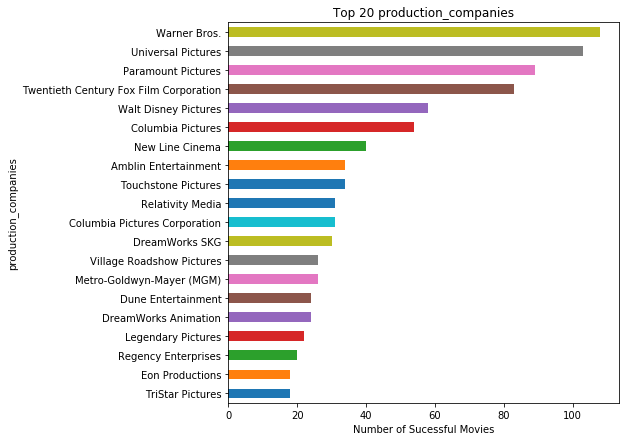

In [12]:
top('production_companies',20);

we use the top function to extract the top 10 genres in the data set as they are more related to the successful movies and we concluded that making a movie with one or more of these genres to be a successful movies

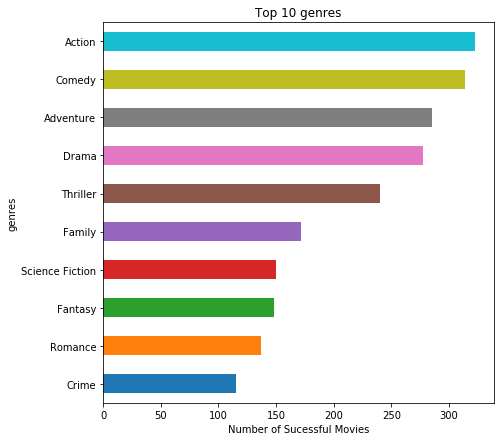

In [13]:
top('genres',10);

we collected the top 30 actors to have particepated in most successful movies using the top function

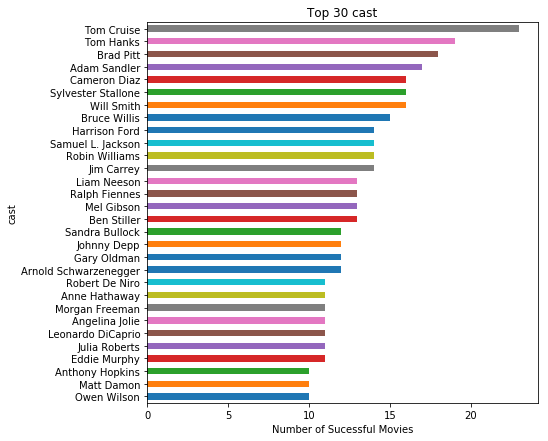

In [14]:
top('cast',30)

the top 10 directors in making successful movies

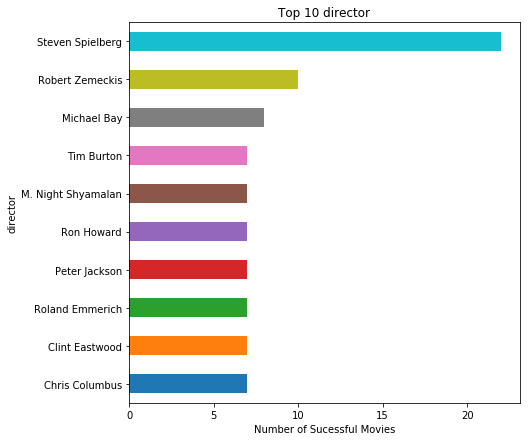

In [15]:
top('director',10)

most frequent runtime of the successful movies

In [16]:
sm.runtime.mode()

0    115
dtype: int64

mean of the time as just to compare it to the mean

In [17]:
sm.runtime.mean()

116.04923798358733

the year which had the biggest number of successful movies

In [18]:
#the year which had the biggest number of successful movies
sm.release_year.mode()

0    2014
dtype: int64

<a id='conclusions'></a>
## Conclusions

in this analysis there were 2 posed questions and they are :

1-Which genres are most popular from year to year?

to answer this question we had to go over the dataset to see what is the most frequent genres over every year and we noticed that 

**Drama is the most popular genre in this dataset over the years** but we also noticed that the victory is not over all the years as there was a competator that rise sometimes and it is Comedy

2-What kinds of properties are associated with movies that have high revenues?

to answer this question we had to select the data of the movies with the profit of 100 million or more and we represnted the list of the most profitable actors and directors and production companies that will increase the likelihood of having a successful movie and we also showed that it was most frequent in the dataset for a profitable movie to have a runtime of 115 min and to be released in 2014 year

## Limitations

1-Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

2-the dataset has some odd recodings as almost the 2 thirds of the dataset has a zero revenue and zero budget and that was missleading for our analysis

3-the meausring of success with brofit can be missleading as we didn't count the inflation and real value of money.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0